In [8]:
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [9]:
# Input data:
sleep_min = {'hours': 7, 'color_start': 'grey', 'color_end': 'grey'}
sleep_range = {'hours': 2, 'color_start': '#F2F2F2', 'color_end': 'grey'}
awake = {'hours': 15, 'color_start': '#0E294F', 'color_end': '#0E294F'}

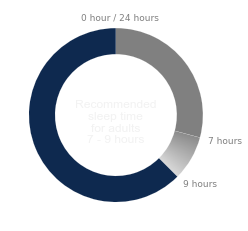

In [12]:
# Elements of donut chart:
sizes_pie = [sleep_range['hours'], sleep_min['hours'], awake['hours']]
color_gradient = [(sleep_range['color_start'], sleep_range['color_end']),
                  (sleep_min['color_start'], sleep_min['color_end']),
                  (awake['color_start'], awake['color_end'])]

fig, ax = plt.subplots()

# Creating of Donut chart:
patches, texts = ax.pie(sizes_pie, 
                        startangle=315, 
                        wedgeprops={'width': 0.3, 
                                    'linewidth': 0.1, 
                                    'edgecolor': '#F2F2F2'})

# Color gradient of chart segments:
for patches, color_gradient in zip(patches, color_gradient):

    patches.set_facecolor('none')

    bbox = patches.get_path().get_extents()
    x_min, x_max, y_min, y_max = bbox.xmin, bbox.xmax, bbox.ymin, bbox.ymax
    x = np.linspace(x_min, x_max, 256)[np.newaxis, :]
    y = np.linspace(y_min, y_max, 256)[:, np.newaxis]

    fill = np.degrees(np.pi - np.arctan2(y, -x))
    gradient = ax.imshow(fill, 
                         cmap = LinearSegmentedColormap.from_list('',
                                                                  color_gradient),
                         extent = [x_min, x_max, y_min, y_max],
                         origin='lower')
    gradient.set_clip_path(patches)

# Chart Title and Labels:
plt.title('Recommended\nsleep time\nfor adults\n7 - 9 hours', 
          {'fontname':'Arial'}, fontsize=12, color="#F2F2F2", y=1, pad=-136)

def chart_label(color, fontsize, ha):
    """Display hour marks on the chart"""
    plt.text(0.05, 1.1, '0 hour / 24 hours', color=color, 
             fontsize=fontsize, ha=ha)
    plt.text(1.25, -0.32, '7 hours', color=color, fontsize=fontsize, ha=ha)
    plt.text(0.970, -0.82, '9 hours', color=color, fontsize=fontsize, ha=ha)

chart_label('grey', 9, 'center')

plt.savefig('donut_chart_sleep_time.png', dpi=200, facecolor='#222222', 
            bbox_inches="tight")

plt.show()